In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Model
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Input ,Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt


In [2]:
IMAGE_SIZE = (224, 224)
batch_size = 20

In [3]:
# Load the pre-trained DenseNet121 model without the top (classification) layer
densenet = DenseNet121(weights='imagenet', include_top=False,input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

In [4]:
for layer in densenet.layers:
    layer.trainable = False

In [6]:
# Training Image preprocessing
train_datagen  = ImageDataGenerator(    
rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)   
training_set = train_datagen.flow_from_directory(
'train_1',target_size=IMAGE_SIZE,batch_size=batch_size,class_mode='categorical')


# validation Image preprocessing
val_datagen = ImageDataGenerator(
rescale=1./255)
val_set = val_datagen.flow_from_directory(
'val_1',target_size=IMAGE_SIZE,batch_size=batch_size,class_mode='categorical')


# test Image preprocessing
test_datagen = ImageDataGenerator(
rescale=1./255)
test_set = test_datagen.flow_from_directory(
'test_1',target_size=IMAGE_SIZE,batch_size=batch_size,class_mode='categorical')

Found 1280 images belonging to 4 classes.
Found 160 images belonging to 4 classes.
Found 160 images belonging to 4 classes.


In [10]:
x = Flatten()(densenet.output)
x = Dropout(0.5)(x)
prediction = Dense(4 , activation='softmax')(x)
model = Model(inputs=densenet.input , outputs=prediction)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,238,212 (27.61 MB)

 Trainable params: 200,708 (784.02 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [11]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  
    patience=3,           
    restore_best_weights=True)  

In [12]:
# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=training_set,validation_data=val_set,epochs=20 , callbacks=[early_stopping]) 

Epoch 1/20


C:\Users\Revotec\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.4978 - loss: 1.4556 - val_accuracy: 0.7625 - val_loss: 0.6465
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.7960 - loss: 0.6049 - val_accuracy: 0.8375 - val_loss: 0.4990
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.8056 - loss: 0.5186 - val_accuracy: 0.8875 - val_loss: 0.4329
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.8273 - loss: 0.4908 - val_accuracy: 0.8687 - val_loss: 0.4192
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.8540 - loss: 0.3877 - val_accuracy: 0.8625 - val_loss: 0.4172
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.8743 - loss: 0.3567 - val_accuracy: 0.8625 - val_loss: 0.3783
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.8729 - loss: 0.3414 - val_accuracy: 0.8875 - val_loss: 0.2779
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.8795 - loss: 0.3105 - val_accuracy: 0.9062 - val_loss: 0.

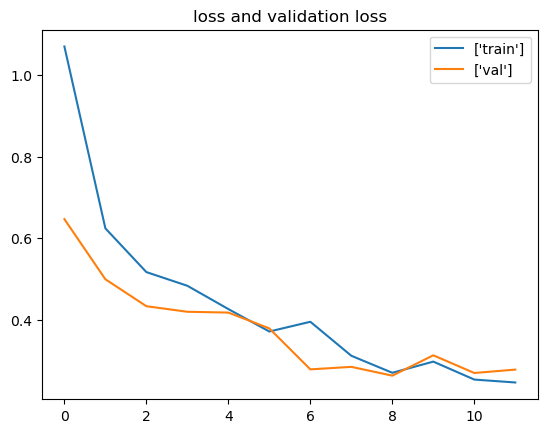

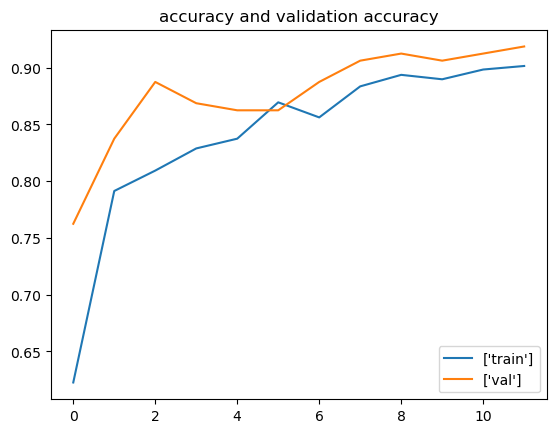

In [13]:
plt.plot(history.history['loss'], label=['train']) #loss de train
plt.plot(history.history['val_loss'], label=['val']) # loss de test
plt.title('loss and validation loss') # title
plt.legend()
plt.show()


plt.plot(history.history['accuracy'], label=['train']) #loss de train
plt.plot(history.history['val_accuracy'], label=['val']) # loss de test
plt.title('accuracy and validation accuracy') # title
plt.legend()
plt.show()

In [15]:
model.save('DenseNet_2_DATASET2_CNN.h5')